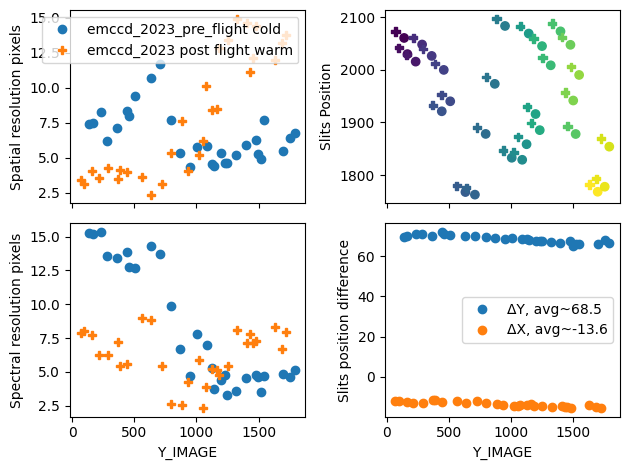

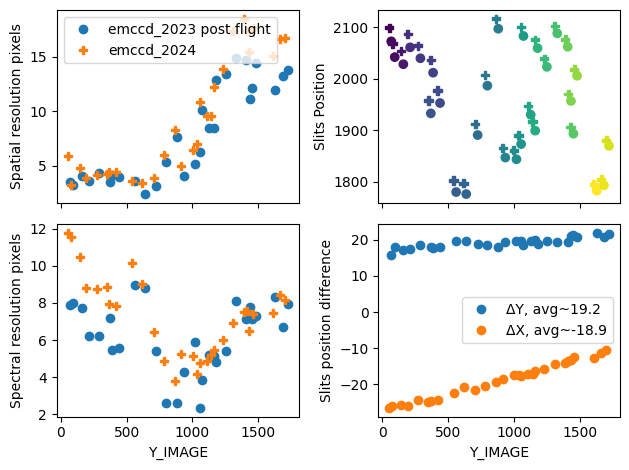

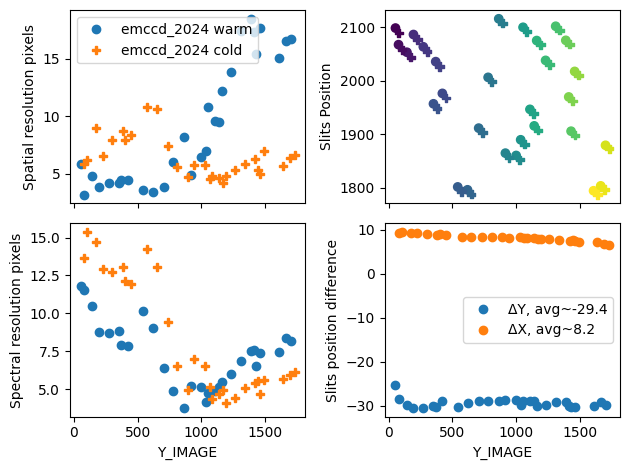

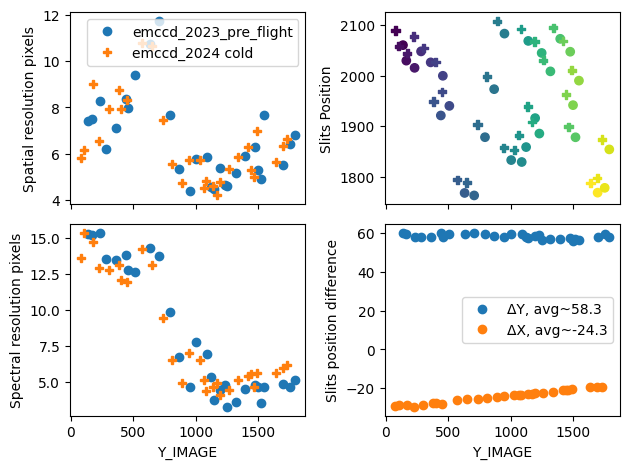

In [13]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

# Load the CSV file into an Astropy Table
emccd_2023 = Table.read('/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2025/DOBC_data/240418_diffuse_focus/STACKS/tilted.csv')#, format='ascii.csv')
emccd_2023_pre_flight = Table.read('/Users/Vincent/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/Safari/tilted_image000010.csv')
emccd_2024 = Table.read('/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2025/DOBC_data/240425/diffuse_illumination/tilted.csv')#, format='ascii.csv')
emccd_2024_cold = Table.read('/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2025/DOBC_data/240429/diffuse_tilted/tilted_image000093.csv')#, format='ascii.csv')

# Access the columns you want to plot

# Plot the data



def plot_diff(c1,c2,n1,n2):
    c1=c1[c1["color"]=="red"]
    c2=c2[c2["color"]=="red"]
    c1["name"] = np.array(c1["name"],dtype=int)
    c2["name"] = np.array(c2["name"],dtype=int)
    fig, ((ax1, ax3),(ax2,ax4)) = plt.subplots(2,2,sharex="col")

    ax1.plot(c1['Y_IMAGE'], c1['fwhm_y'], 'o',label=n1)
    ax1.plot(c2['Y_IMAGE'], c2['fwhm_y'], 'P',label=n2)
    ax1.set_ylabel('Spatial resolution pixels')
    ax1.legend()
    ax2.plot(c1['Y_IMAGE'], c1['fwhm_x'], 'o')
    ax2.plot(c2['Y_IMAGE'], c2['fwhm_x'], 'P')
    ax2.set_xlabel('Y_IMAGE')
    ax2.set_ylabel('Spectral resolution pixels')


    ax3.scatter(c1['Y_IMAGE'], c1['X_IMAGE'], marker='o',c=c1['name'])
    ax3.scatter(c2['Y_IMAGE'], c2['X_IMAGE'], marker='P',c=c2['name'])
    ax3.set_ylabel('Slits Position')



    ax4.plot(c1['Y_IMAGE'], c1['Y_IMAGE']-c2['Y_IMAGE'], 'o',label="ΔY, avg~%0.1f"%(np.mean( c1['Y_IMAGE']-c2['Y_IMAGE'])))
    ax4.plot(c2['Y_IMAGE'], c1['X_IMAGE']-c2['X_IMAGE'], 'o',label="ΔX, avg~%0.1f"%(np.mean( c1['X_IMAGE']-c2['X_IMAGE'])))
    # ax3.plot(c2['X_IMAGE'], c2['Y_IMAGE'], 'o')
    ax4.set_xlabel('Y_IMAGE')
    ax4.set_ylabel('Slits position difference')
    ax4.legend()


    plt.tight_layout()
    plt.show()

plot_diff(emccd_2023_pre_flight,emccd_2023,n1="emccd_2023_pre_flight cold",n2="emccd_2023 post flight warm")
plot_diff(emccd_2023,emccd_2024,n1="emccd_2023 post flight",n2="emccd_2024")
plot_diff(emccd_2024,emccd_2024_cold,n1="emccd_2024 warm",n2="emccd_2024 cold")
plot_diff(emccd_2023_pre_flight,emccd_2024_cold,n1="emccd_2023_pre_flight",n2="emccd_2024 cold")


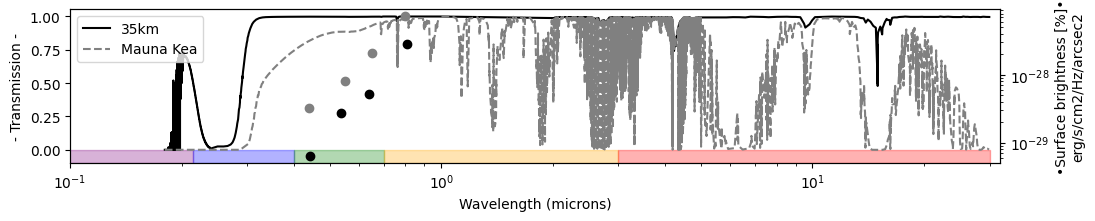

In [26]:
atm = Table.read('/Users/Vincent/Documents/CSVs/atm.csv')#, format='ascii.csv')
mona_kea = Table.read('/Users/Vincent/Documents/CSVs/mona_kea.csv')#, format='ascii.csv')

atm.sort("wave")
mona_kea.sort("wave")
plt.figure(figsize=(12,2))
plt.semilogx(atm["wave"]/1000,atm["trans"],"k-",label="35km")
plt.semilogx(mona_kea["wave"]/1000,mona_kea["trans"], "--",c="gray",label="Mauna Kea")
plt.xlabel("Wavelength (microns)")
plt.ylabel("- Transmission -")

plt.xlim(xmin=0.1,xmax=32)
plt.legend(loc="upper left")
nuv_range = (0.0900, 0.2150)
fuv_range = (0.2150, 0.4)
visible_range = (0.4, 0.7)
nir_range = (0.7, 3)
mir_range = (3, 30)
fir_range = (30, 1000)  # Adjusted for demonstration
plt.fill_between(nuv_range, 0, -0.1, color='purple', alpha=0.3, label='NUV')
plt.fill_between(fuv_range, 0, -0.1, color='blue', alpha=0.3, label='FUV')
plt.fill_between(visible_range, 0, -0.1, color='green', alpha=0.3, label='Visible')
plt.fill_between(nir_range, 0, -0.1, color='orange', alpha=0.3, label='NIR')
plt.fill_between(mir_range, 0, -0.1, color='red', alpha=0.3, label='MIR')
plt.ylim(ymin=-0.1)



ax2 = plt.twinx()
ax2.set_ylabel("•Surface brightness [%]•\nerg/s/cm2/Hz/arcsec2")
537.0139968895802, 2.7583718939986224e-29
ax2.semilogy([0.442,0.537,0.640,0.810], [6.348492679619366e-30,2.7583718939986224e-29,5.279003242833762e-29,2.8154958798777713e-28], "ok", label="35km")
ax2.semilogy([0.439,0.549,0.652,0.799], [3.272177057068911e-29, 8.230576712142024e-29, 2.0702545074114987e-28, 7.327994980940509e-28], "o",c="grey", label="35km")
plt.savefig("/tmp/test.png")
plt.show()
# plt.fill_between(fir_range, 0, -0.1, color='brown', alpha=0.3, label='FIR')
# plt.text)

# 442.76827371695185, 6.348492679619366e-30
# 537.0139968895802, 2.7583718939986224e-29
# 640.5909797822707, 5.279003242833762e-29
# 810.4199066874029, 2.8154958798777713e-28
# 439.03576982892696, 3.272177057068911e-29
# 549.1446345256611, 8.230576712142024e-29
# 652.7216174183516, 2.0702545074114987e-28
# 799.2223950233282, 7.327994980940509e-28




![alt text](<Capture d’écran, le 2024-05-09 à 18.57.04.jpg>)

/var/folders/m8/f6l41h_51qxdzrz8p1xqr3f80000gp/T/ipykernel_57564/3918062584.py:6: RuntimeWarning: divide by zero encountered in divide
  plt.semilogy(a["TEMPB"],12.97*3600*a["BottomImage"]/a["EXPTIME"],":o",label="No amplification")


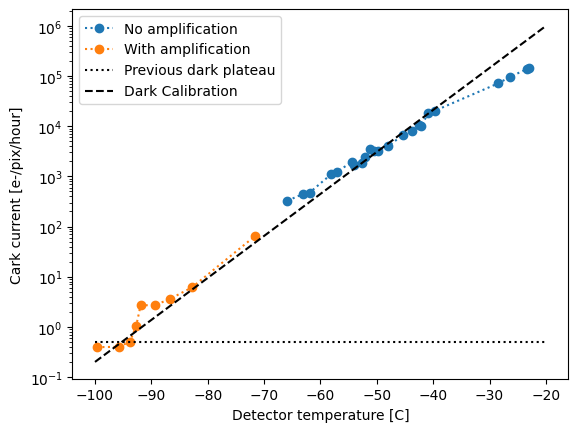

In [12]:
a = Table.read("/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2025/DOBC_data/240429/emgain/HeaderCatalogbasic_estimators_FIREBall.csv")
mask = a["EMGAIN"]==0
a=a[mask]

plt.figure()
plt.semilogy(a["TEMPB"],12.97*3600*a["BottomImage"]/a["EXPTIME"],":o",label="No amplification")
# plt.semilogy([-99.67,-95.7,-93.8,-92.7,-91.9,-89.4,-86.7,-82.8,-71.7],[0.394,0.4,0.51,1.04        ,2.7,2.7,3.6,6.12,2*31.68,],":o",label="With amplification")
plt.semilogy([-99.67,-95.7,-93.8,-92.7,-91.9,-89.4,-86.7,-82.8,-71.7],[0.394,0.4,0.51,1.04        ,2.7,2.7,3.6,6.12,2*31.68,],":o",label="With amplification")
plt.semilogy([-100,-20],[0.5,0.5],":k",label="Previous dark plateau")
# plt.semilogy([-100,-20],[2.7,2.7],":k",label="New dark plateau?")
plt.semilogy([-100,-20],[0.2,1e6],"--k",label="Dark Calibration")
plt.legend()
plt.ylabel("Cark current [e-/pix/hour]")
plt.xlabel("Detector temperature [C]")
plt.show()